In [2]:
import dtale
import pandas as pd

df= pd.read_excel("Test Data.xlsx")

d= dtale.show(df)
d.open_browser()

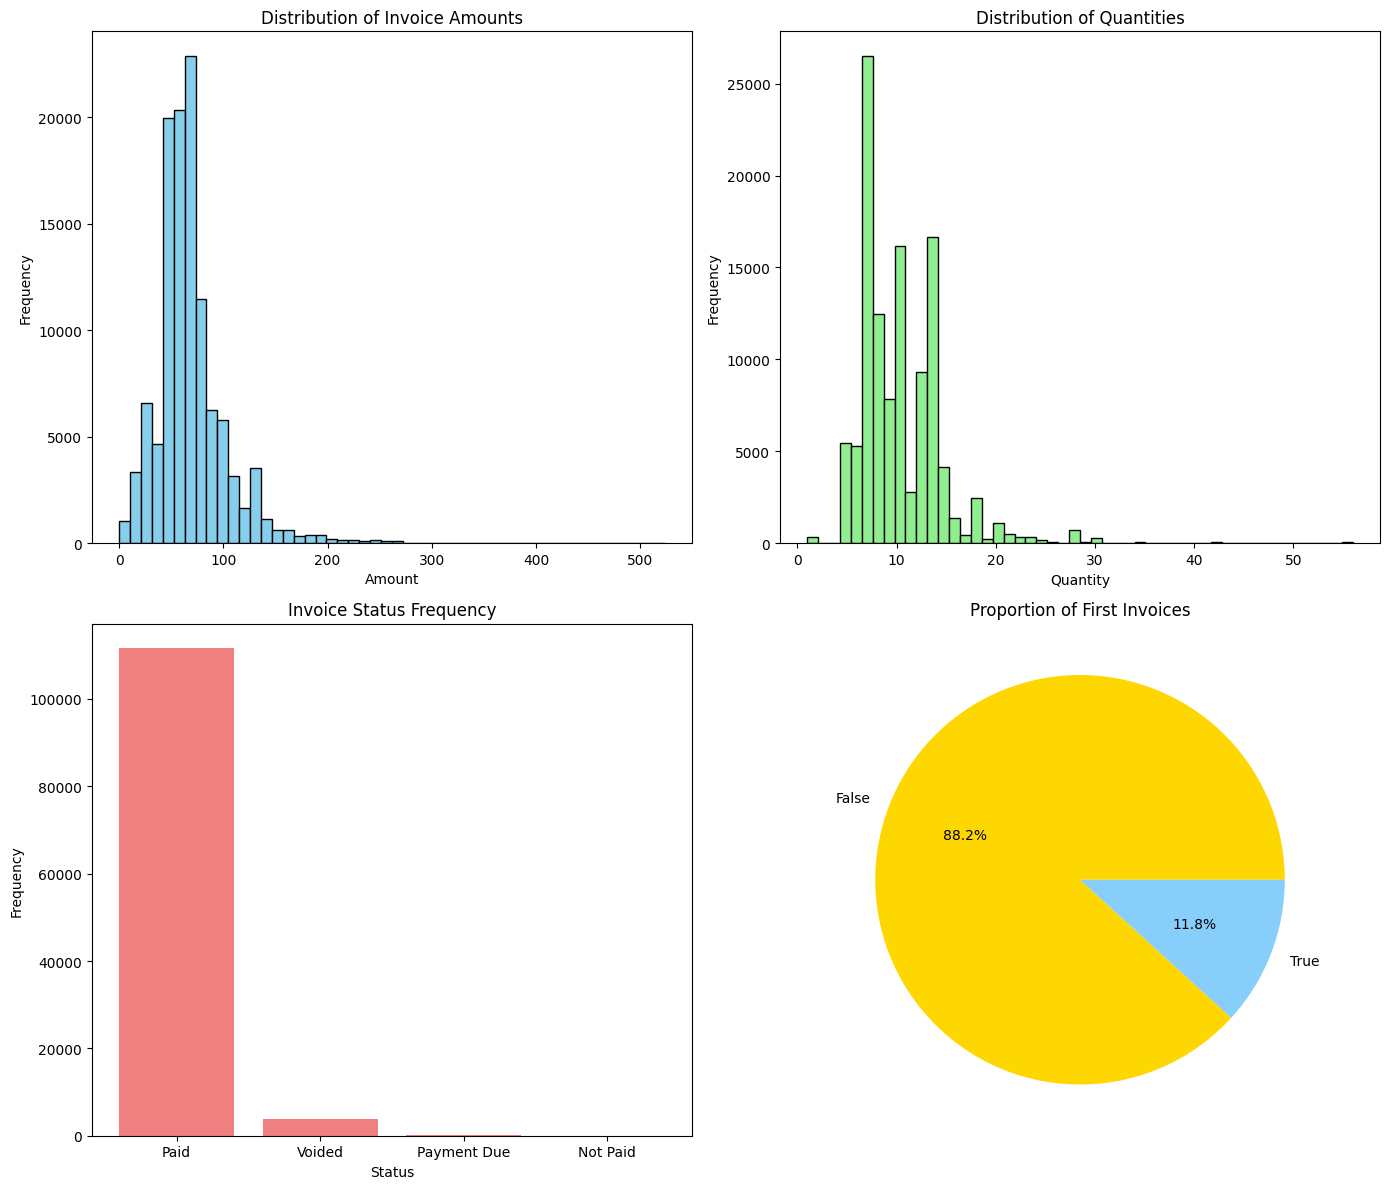

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

data= pd.read_excel("Test Data.xlsx")

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

axs[0, 0].hist(data['Amount'], bins=50, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Distribution of Invoice Amounts')
axs[0, 0].set_xlabel('Amount')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(data['Quantity'], bins=50, color='lightgreen', edgecolor='black')
axs[0, 1].set_title('Distribution of Quantities')
axs[0, 1].set_xlabel('Quantity')
axs[0, 1].set_ylabel('Frequency')

status_counts = data['Status'].value_counts()
axs[1, 0].bar(status_counts.index, status_counts.values, color='lightcoral')
axs[1, 0].set_title('Invoice Status Frequency')
axs[1, 0].set_xlabel('Status')
axs[1, 0].set_ylabel('Frequency')

first_invoice_counts = data['First Invoice'].value_counts()
axs[1, 1].pie(first_invoice_counts, labels=first_invoice_counts.index, autopct='%1.1f%%', colors=['gold', 'lightskyblue'])
axs[1, 1].set_title('Proportion of First Invoices')


fig.tight_layout()
plt.show()

In [8]:
import pandas as pd
import numpy as np

data= pd.read_excel("Test Data.xlsx")

data_without_invoice_number = data.drop(columns=['Invoice Number', 'Customer Id', 'Subscription Id', 'Status', 'First Invoice'])

numerical_stats = data_without_invoice_number.describe(include=[np.number])


descriptive_stats = pd.concat([numerical_stats], axis=0)

print(descriptive_stats)



categorical_stats = {
    'Statistic': ['Count', 'Unique', 'Most Frequent', 'Frequency'],
    'Customer Id': [
        data['Customer Id'].count(),
        data['Customer Id'].nunique(),
        data['Customer Id'].mode()[0],
        data['Customer Id'].value_counts().iloc[0]
    ],
    'Subscription Id': [
        data['Subscription Id'].count(),
        data['Subscription Id'].nunique(),
        data['Subscription Id'].mode()[0],
        data['Subscription Id'].value_counts().iloc[0]
    ],
    'Status': [
        data['Status'].count(),
        data['Status'].nunique(),
        data['Status'].mode()[0],
        data['Status'].value_counts().iloc[0]
    ],
    'First Invoice': [
        data['First Invoice'].count(),
        data['First Invoice'].nunique(),
        data['First Invoice'].mode()[0],
        data['First Invoice'].value_counts().iloc[0]
    ]
}

categorical_table = pd.DataFrame(categorical_stats)

print(categorical_table)

              Amount       Quantity
count  115405.000000  115405.000000
mean       69.014190      10.311451
std        35.027479       4.342406
min         0.000000       1.000000
25%        50.190000       7.000000
50%        63.390000       9.000000
75%        80.970000      14.000000
max       523.340000      56.000000
       Statistic       Customer Id   Subscription Id  Status First Invoice
0          Count            115405            115284  115405        115405
1         Unique             22121             22278       4             2
2  Most Frequent  16BTTYTiV1mFs2sY  16BTLSTqJkB2r4ND    Paid         False
3      Frequency                49                31  111628        101808


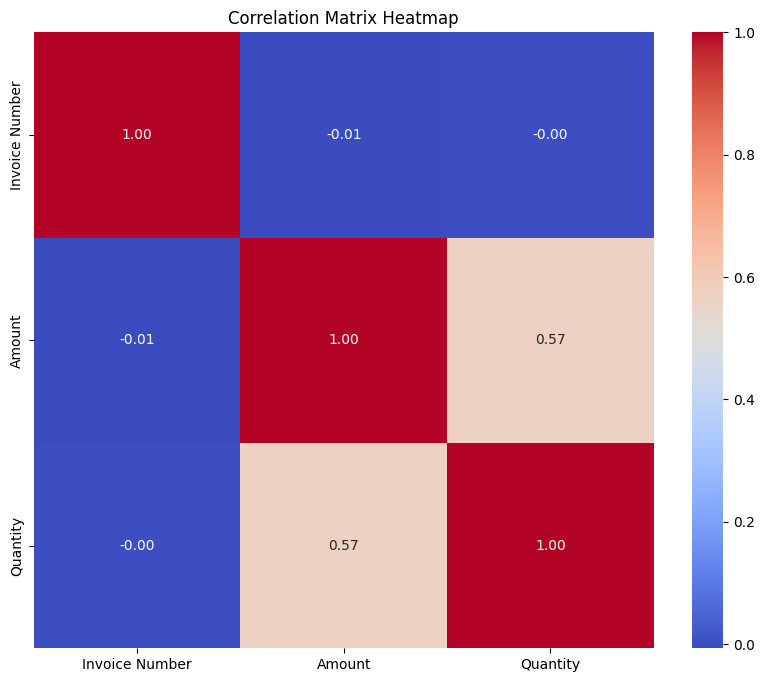

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data= pd.read_excel("Test Data.xlsx")

numerical_data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()
